In [43]:
import requests
import pandas as pd

headers = {
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'en-US,en;q=0.9,es;q=0.8,ca;q=0.7',
    'origin': 'https://www.morningstar.co.uk',
    'priority': 'u=1, i',
    'referer': 'https://www.morningstar.co.uk/uk/screener/stock.aspx',
    'sec-ch-ua': '"Google Chrome";v="125", "Chromium";v="125", "Not.A/Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36',
}


data = pd.DataFrame()
for universe_id in ['E0EXG$XNYS', 'E0EXG$XNAS']:
    params = {
        'page': '1',
        'pageSize': '50000',
        'sortOrder': 'Name asc',
        'outputType': 'json',
        'version': '1',
        'languageId': 'en-GB',
        'currencyId': 'USD',
        'universeIds': universe_id,
        'securityDataPoints': 'SecId|LegalName|Name|IndustryName|SectorName|TenforeId|Universe|ExchangeId|Ticker|ClosePrice|MarketCap|DividendYield|PERatio|PEGRatio|MarketCountryName|EquityStyleBox|ReturnD1|ReturnW1|ReturnM1|ReturnM3|ReturnM6|ReturnM0|ReturnM12|ReturnM36|ReturnM60|ReturnM120|EBTMarginYear1|ROEYear1|ROICYear1|EPSGrowth3YYear1|RevenueGrowth3Y|DebtEquityRatio|NetMargin|ROATTM|ROETTM',
        'filters': '',
        'term': '',
        'subUniverseId': '',
    }

    response = pd.DataFrame(requests.get('https://tools.morningstar.co.uk/api/rest.svc/klr5zyak8x/security/screener', params=params, headers=headers).json()['rows'])
    data = pd.concat([response, data], ignore_index=True)
#VALUE = 1,4,7
#GROWTH = 3,6,9
value = data[data['EquityStyleBox'].isin([1, 4, 7])]
growth = data[data['EquityStyleBox'].isin([3, 6, 9])]


In [44]:
import yfinance as yf

# Ticker symbol for SPYG
ticker_growth = "SPYG"
ticker_value = "SPYV"
# Fetch the data
spyg_data = yf.Ticker(ticker_growth)
spyv_data = yf.Ticker(ticker_value)
# Display historical market data
historical_data_growth = spyg_data.history(period="max")
historical_data_value = spyv_data.history(period="max")


In [45]:
retornos = [columna for columna in list(value.columns) if "Return" in columna]
value_return = value[["SecId","LegalName"]+retornos]

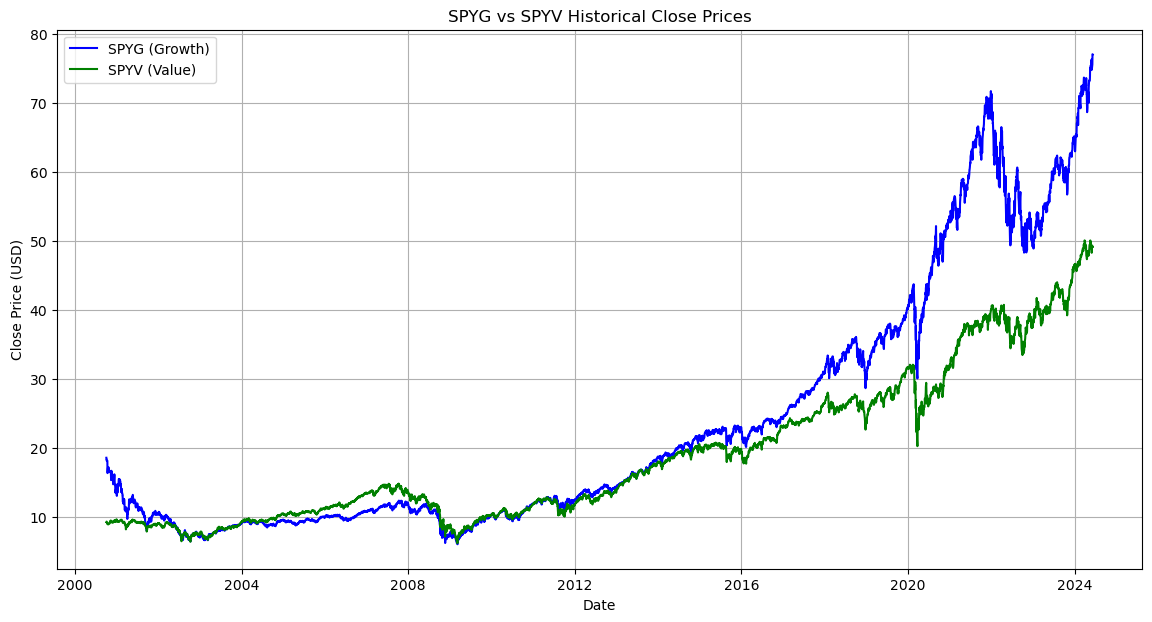

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(historical_data_growth.index, historical_data_growth['Close'], label='SPYG (Growth)', color='blue')
plt.plot(historical_data_value.index, historical_data_value['Close'], label='SPYV (Value)', color='green')

# Add title and labels
plt.title('SPYG vs SPYV Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_1736\3979843629.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Strategy_Return'].iloc[i] = (combined_data['SPYV_Close'].iloc[i] / combined_data['SPYV_Close'].iloc[i-1]) - 1
C:\Users\Usuario1\AppData\Local\Temp\ipykernel_1736\3979843629.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['Investment_Value'].iloc[i] = combined_data['Investment_Value'].iloc[i-1] * (1 + combined_data['Strategy_Return'].iloc[i])


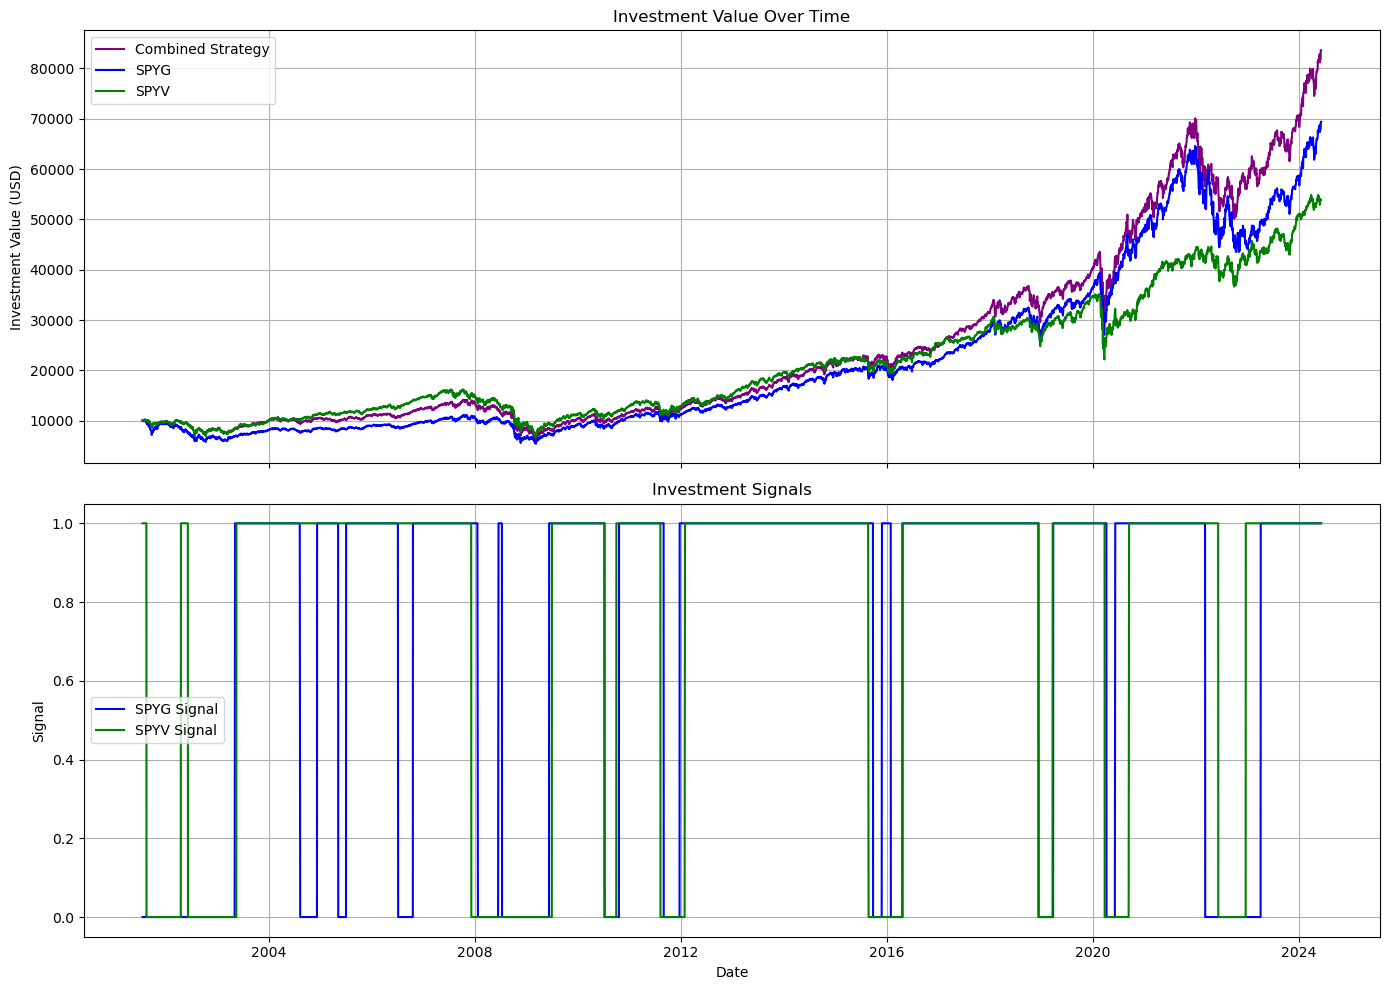

In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker symbols
ticker_growth = "SPYG"
ticker_value = "SPYV"

# Fetch the data
spyg_data = yf.Ticker(ticker_growth).history(period="max")
spyv_data = yf.Ticker(ticker_value).history(period="max")

# Ensure both dataframes have the same dates
combined_data = pd.DataFrame({
    'SPYG_Close': spyg_data['Close'],
    'SPYV_Close': spyv_data['Close']
}).dropna()

# Calculate 50-day and 200-day moving averages for both ETFs
combined_data['SPYG_50_MA'] = combined_data['SPYG_Close'].rolling(window=50).mean()
combined_data['SPYG_200_MA'] = combined_data['SPYG_Close'].rolling(window=200).mean()
combined_data['SPYV_50_MA'] = combined_data['SPYV_Close'].rolling(window=50).mean()
combined_data['SPYV_200_MA'] = combined_data['SPYV_Close'].rolling(window=200).mean()

combined_data.dropna(inplace=True)

# Create signals
combined_data['SPYG_Signal'] = combined_data['SPYG_50_MA'] > combined_data['SPYG_200_MA']
combined_data['SPYV_Signal'] = combined_data['SPYV_50_MA'] > combined_data['SPYV_200_MA']

# Initialize a column for the strategy's daily returns
combined_data['Strategy_Return'] = 0

# Define initial investment
initial_investment = 10000
combined_data['Investment_Value'] = initial_investment

# Calculate daily returns
for i in range(1, len(combined_data)):
    if combined_data['SPYG_Signal'].iloc[i]:
        combined_data['Strategy_Return'].iloc[i] = (combined_data['SPYG_Close'].iloc[i] / combined_data['SPYG_Close'].iloc[i-1]) - 1
    else:
        combined_data['Strategy_Return'].iloc[i] = (combined_data['SPYV_Close'].iloc[i] / combined_data['SPYV_Close'].iloc[i-1]) - 1
    
    # Update investment value
    combined_data['Investment_Value'].iloc[i] = combined_data['Investment_Value'].iloc[i-1] * (1 + combined_data['Strategy_Return'].iloc[i])

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the investment value over time
ax[0].plot(combined_data.index, combined_data['Investment_Value'], label='Combined Strategy', color='purple')
ax[0].plot(combined_data.index, initial_investment * combined_data['SPYG_Close'] / combined_data['SPYG_Close'].iloc[0], label='SPYG', color='blue')
ax[0].plot(combined_data.index, initial_investment * combined_data['SPYV_Close'] / combined_data['SPYV_Close'].iloc[0], label='SPYV', color='green')
ax[0].set_title('Investment Value Over Time')
ax[0].set_ylabel('Investment Value (USD)')
ax[0].legend()
ax[0].grid(True)

# Plot the signals
ax[1].plot(combined_data.index, combined_data['SPYG_Signal'], label='SPYG Signal', color='blue')
ax[1].plot(combined_data.index, combined_data['SPYV_Signal'], label='SPYV Signal', color='green')
ax[1].set_title('Investment Signals')
ax[1].set_ylabel('Signal')
ax[1].set_xlabel('Date')
ax[1].legend()
ax[1].grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [52]:
# New strategy has to be developed